### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Read the 3 datasets into dataframes 

In [2]:
data = pd.read_csv("Data.csv")
item = pd.read_csv("item.csv")
user = pd.read_csv("user.csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data

In [3]:
#Data.csv - the number of missing values
data.isnull().sum().sum() 

0

In [4]:
#Data.csv - data info
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
#Data.csv - data shape
data.shape 

(100000, 4)

In [6]:
#Data.csv - data descrption  
data.describe() 

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [7]:
#item.csv - the number of missing values
item.isnull().sum().sum()

0

In [8]:
#item.csv - data info
item.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [9]:
#item.csv - data shape
item.shape

(1681, 22)

In [10]:
#item.csv - data descrption 
item.describe() 

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#user.csv - the number of missing values
user.isnull().sum().sum()

0

In [12]:
#user.csv - data info
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [13]:
#user.csv - data shape
user.shape

(943, 5)

In [14]:
#user.csv - data descrption 
user.describe() 

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


#### 4. Find the number of movies per genre using the item data 

In [15]:
item_genre = item.copy() #Make a copy of orgnal data item
item_genre = item_genre.drop(["movie id", "movie title", "release date"], axis=1) #deleting un-need columns
pd.DataFrame(item_genre.sum(), columns= ['Number of Movies']) #count 

,Number of Movies
unknown,1
Action,251
Adventure,135
Animation,42
Childrens,122
Comedy,505
Crime,109
Documentary,50
Drama,725
Fantasy,22


#### 5. Find the movies that have more than one genre 

In [16]:
item_cunter = item.copy() # make a copy of item data to work on it
item_cunter = item_cunter.drop(["movie id",  "release date"], axis=1) # removing "the id"
# becouse the id is count as a number 
df=pd.DataFrame(item_cunter.sum(axis = 1), columns= ['Number of Genre'] )
# ceate a DF to counte the number of genre 
item_cunter[df['Number of Genre'] >1] # apply the function that show the movies have more than a gente

,movie title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GoldenEye,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Get Shorty,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Copycat,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
6,Twelve Monkeys,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,MURDER and murder,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
1668,Tainted,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1671,Mirage,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1677,B. Monkey,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


#### 6. Drop the movie where the genre is unknown 

In [17]:
item.drop(["unknown"], axis=1) # apply deop()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' 

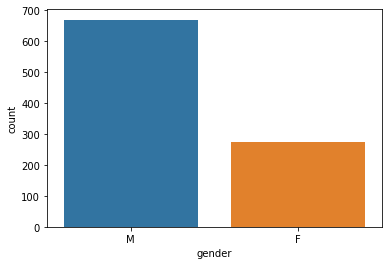

In [18]:
sns.countplot(x="gender", data=user) # gender column countplot

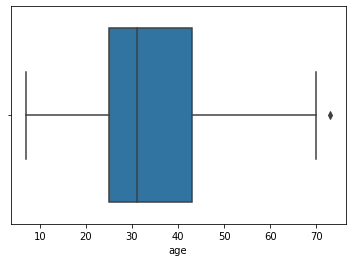

In [19]:
sns.boxplot(x=user['age']) # age 

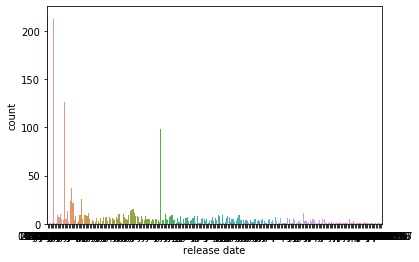

In [20]:
sns.countplot(x="release date", data=item)# release date

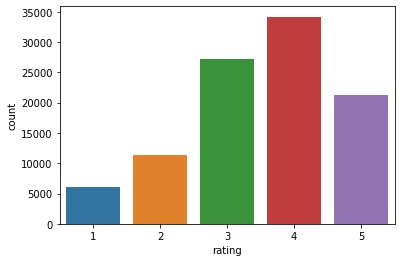

In [21]:
sns.countplot(x="rating", data=data) #raring

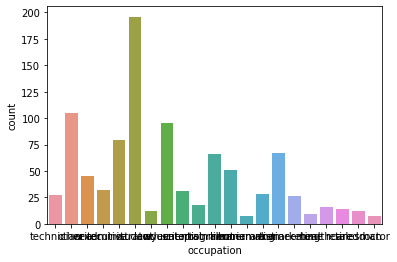

In [22]:
sns.countplot(x="occupation", data=user)



### 8. Visualize how popularity of genres has changed over the years



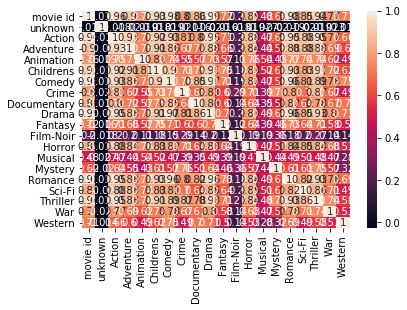

In [23]:
#genre = item_genre.sum()

#genre
df1=item.groupby('release date').sum()
df1.drop(["movie id"], axis=1) 
corr = df1.corr()
sns.heatmap(corr, annot = True)

### 9. Find the top 25 movies, each having a minimum of 100 ratings



In [24]:
movies_rat = pd.merge(item,data, how='outer',on='movie id') # marge item and data by movie id as revr
movies_rat.groupby('movie title')['rating'].sum().sort_values(ascending = False ).head(25)
# show the top 25 title movies rating.

movie title
Star Wars                     2541
Fargo                         2111
Return of the Jedi            2032
Contact                       1936
Raiders of the Lost Ark       1786
Godfather, The                1769
English Patient, The          1759
Toy Story                     1753
Silence of the Lambs, The     1673
Scream                        1645
Pulp Fiction                  1600
Air Force One                 1565
Empire Strikes Back, The      1543
Liar Liar                     1531
Twelve Monkeys                1489
Titanic                       1486
Independence Day (ID4)        1475
Chasing Amy                   1455
Jerry Maguire                 1425
Rock, The                     1396
Fugitive, The                 1359
Princess Bride, The           1352
Back to the Future            1342
Star Trek: First Contact      1336
Schindler's List              1331
Name: rating, dtype: int64

### 10. See gender distribution across different genres check for the validity of the below statements

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [25]:
MyData = pd.merge(movies_rat,user, how='outer',on='user id') # add user data to what I cearted in Q9 by user id
#now MyData has all 3 data 
MyData

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Thriller,War,Western,user id,rating,timestamp,age,gender,occupation,zip code
0,1,Toy Story,01-Jan-1995,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,308,4,887736532,60,M,retired,95076
1,4,Get Shorty,01-Jan-1995,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,308,5,887737890,60,M,retired,95076
2,5,Copycat,01-Jan-1995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys,01-Jan-1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,308,4,887738847,60,M,retired,95076
4,8,Babe,01-Jan-1995,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,308,5,887736696,60,M,retired,95076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,748,"Saint, The",14-Mar-1997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,729,4,893286638,19,M,student,56567
99996,751,Tomorrow Never Dies,01-Jan-1997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,729,3,893286338,19,M,student,56567
99997,879,"Peacemaker, The",01-Jan-1997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,729,3,893286299,19,M,student,56567
99998,894,Home Alone 3,01-Jan-1997,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,729,1,893286511,19,M,student,56567


In [26]:
#1- Men watch more drama than women?
MyData.groupby('gender')['Drama'].sum()
#yes, Men watch more drama than women

gender
F    11008.0
M    28887.0
Name: Drama, dtype: float64

In [27]:
# 2- Women watch more Sci-Fi than men?
MyData.groupby('gender')['Sci-Fi'].sum()
# No, Men watch more Sci-Fi than Women

gender
F     2629.0
M    10101.0
Name: Sci-Fi, dtype: float64

In [28]:
#3- Men watch more Romance than women
MyData.groupby('gender')['Romance'].sum()
# yes, Men watch more Romance than women

gender
F     5858.0
M    13603.0
Name: Romance, dtype: float64